<a href="https://colab.research.google.com/github/miljanamilosevic/Car-Price-Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import kurtosis
from scipy.stats import skew

Učitavanje baze:

In [ ]:
data =pd.read_csv('/content/car_price_prediction.csv')
data.head()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
data.describe()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Provera da li ima dupliranih vrednosti, i ako da, izbacivanje istih.

In [ ]:
data.duplicated().sum()

313

In [ ]:
data.drop_duplicates(inplace= True)

Sređivanje baze: izbacivanje obeležja koja ne utiču na predikciju cene automobila i sređivanje podataka u okviru ostalih obeležja.

In [ ]:
data=data.drop(['ID','Doors', 'Color'],axis=1)
# Zamena '-' sa 0
data['Levy']=data['Levy'].replace('-','0')
# Konvertovanje poreza u float tip
data['Levy'] = data['Levy'].astype('float64')
# Zamena 'Km' sa ''
data['Mileage'] =data['Mileage'].str.replace('km',"")
# Konvertovanje kilometraze u int64
data.Mileage = data.Mileage.astype('Int64')
# Dodavanje kolone 'starost' kao zamena za godinu proizvodnje
dtime = dt.datetime.now()
data['Age']=dtime.year - data['Prod. year']
data = data.drop('Prod. year',axis=1)
# Zamena 'Turbo' sa ''
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','')
# Konvertovanje zapremine motora u float tip
data['Engine volume'] = data['Engine volume'].astype('float64')

In [ ]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,12,13
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,8,12
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,2,17
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,0,12
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,4,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  Int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Airbags           18924 non-null  int64  
 14  Age               18924 non-null  int64  
dtypes: Int64(1), float64(3), int64(3), object(8)
memory usage: 2.3+ MB


In [ ]:
data.shape

(18924, 15)

Korelacija:

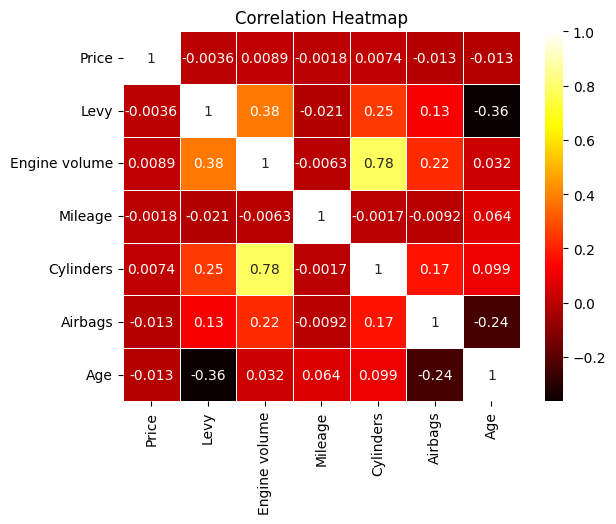

In [ ]:
cor= data.select_dtypes(exclude=object).corr()
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

Proveravanje da li ima autlajera:

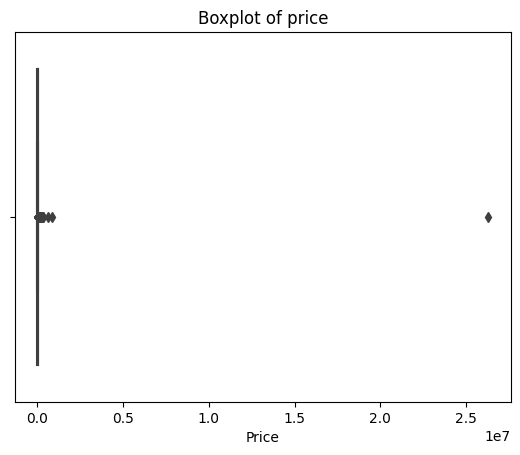

In [ ]:
sns.boxplot(x=data['Price'])
plt.xlabel('Price')
plt.title('Boxplot of price')
plt.show()

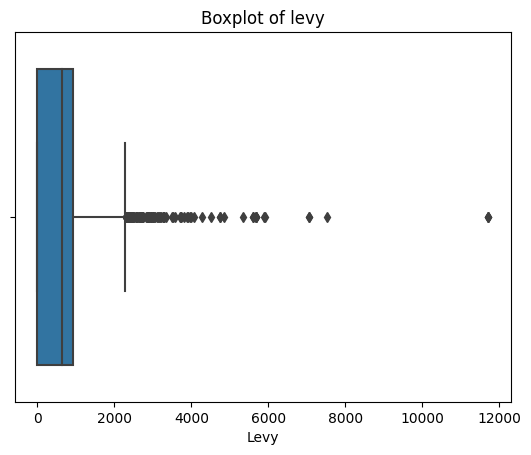

In [ ]:
sns.boxplot(x=data['Levy'])
plt.xlabel('Levy')
plt.title('Boxplot of levy')
plt.show()

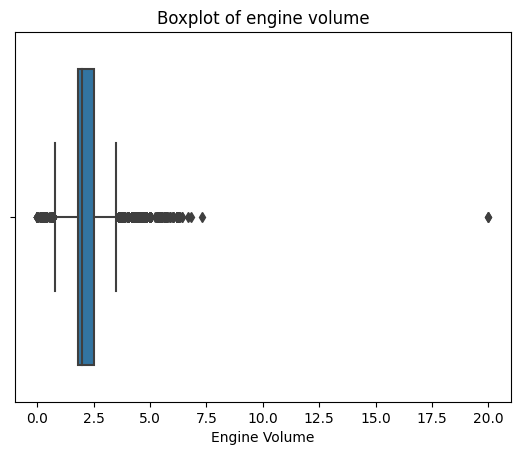

In [ ]:
sns.boxplot(x=data['Engine volume'])
plt.xlabel('Engine Volume')
plt.title('Boxplot of engine volume')
plt.show()

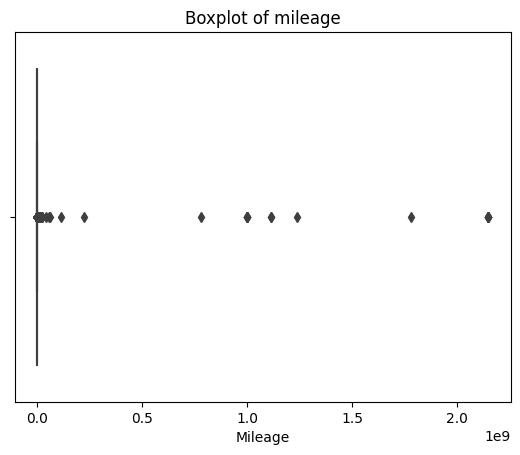

In [ ]:
sns.boxplot(x=data['Mileage'])
plt.xlabel('Mileage')
plt.title('Boxplot of mileage')
plt.show()

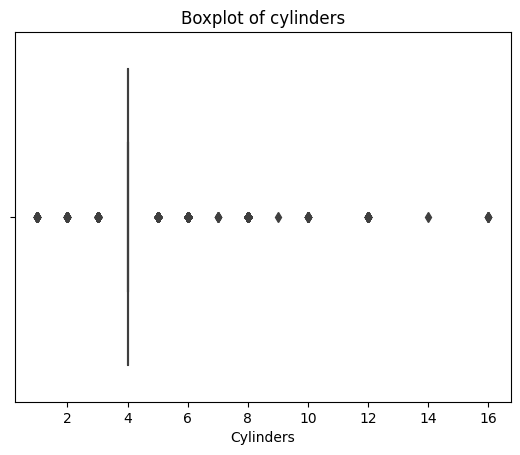

In [ ]:
sns.boxplot(x=data['Cylinders'])
plt.xlabel('Cylinders')
plt.title('Boxplot of cylinders')
plt.show()

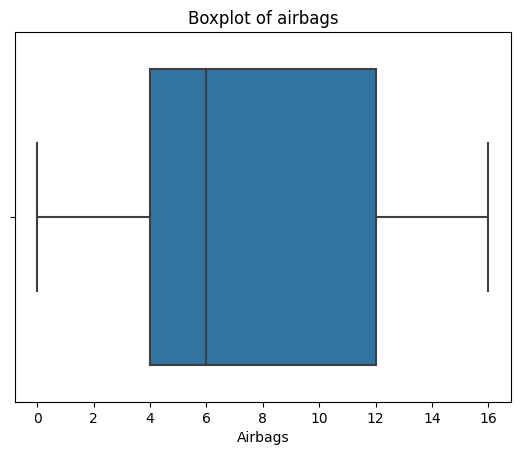

In [ ]:
sns.boxplot(x=data['Airbags'])
plt.xlabel('Airbags')
plt.title('Boxplot of airbags')
plt.show()

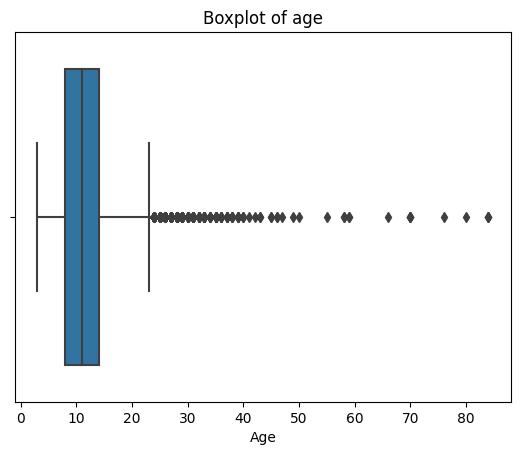

In [ ]:
sns.boxplot(x=data['Age'])
plt.xlabel('Age')
plt.title('Boxplot of age')
plt.show()

In [ ]:
print('koef.asimetrije:  %.2f' % skew(data['Price']))
print('koef.spljoštenosti:  %.2f' % kurtosis(data['Price']))

koef.asimetrije:  135.38
koef.spljoštenosti:  18519.20
